# TME Robotique et Apprentissage: Optimisation Multi-Objectif

* Étudiant: Nom: XXX Prénom: XXX

## Introduction

Dans ce TME, vous allez prendre en main différents algorithmes évolutionnistes multi-objectifs et regarder comment ils se comportent. Pour cela, différentes fonctions vous sont fournies afin de tracer les individus générés à chaque génération ou de comparer les résultats entre eux. Vous testerez également Gym, un environnement utilisé en apprentissage par renforcement pour normaliser les expériences d'apprentissage sur des robots (virtuels).

Vous complèterez ce notebook et le soumettrez, avec les fichiers pythons que vous aurez écrits, sur Moodle. Si cela ne marche pas, vous enverrez le tout à stephane.doncieux@sorbonne-universite.fr avec les fichiers python associés. **ATTENTION** merci de mettre comme sujet: \[TME RA\] nom1 et nom2, au risque que votre mail soit perdu dans les limbes...

Pour ne pas surcharger le notebook, vous mettrez de préférence votre code dans un fichier python que vous chargerez avec un import. Le code que vous mettrez dans le notebook sera le code appelant vos fonctions et affichant le résultat. Vous prendrez soin d'assurer la lisibilité de votre notebook (limitez l'affichage au nécessaire et n'oubliez pas d'enlever les affichages que vous utiliserez peut-être pendant la phase de développement et de débogage). La lisibilité de votre notebook influera sur l'évaluation de votre travail. 

Vous aurez besoin de la bibliothèque DEAP (https://deap.readthedocs.io/en/master/) et d'OpenAI Gym (https://gym.openai.com/). Ces deux bibliothèques s'installent facilement avec la commande `pip`, comme indiqué dans leur documentation.


In [1]:
# Note: l'import d'un fichier ne se fait qu'une seule fois. Si vous modifiez ce fichier, 
# il vous faut redémarrer votre kernel si vous voulez prendre en compte les modifications.
# vous pouvez éviter cela de la façon suivante: 
import importlib # une seule fois

#import mon_module_python # le module doit avoir été importé une première fois
#importlib.reload(mon_module_python) # cette ligne permet de charger la dernière version
from deap import base, creator, benchmarks
import matplotlib.pyplot as plt
import numpy as np

import ea_simple
import gym_cartpole
import gym_cartpole_2
import nsga2

# pour que les figures apparaissent directement dans le notebook
%matplotlib inline 


## 1. Prise en main de DEAP

Dans la suite du TME, vous serez invités à utiliser DEAP, qui est une bibliothèque python open source, cf https://deap.readthedocs.io/en/master/index.html.

DEAP est une bibliothèque de prototypage rapide d'algorithmes évolutionnistes. Elle permet de travailler à plusieurs niveaux, depuis l'implémentation complète de l'algorithme à partir de briques de base jusqu'à l'utilisation boite noire d'un algorithme entièrement implémenté et en passant par des approches intermédiaires, dans lesquelles des modules sont réutilisés, par exemple pour la sélection, les mutations ou les croisements.  


Écrivez un algorithme évolutionniste de type élitiste qui génèrera lambda individus et choisira les mu meilleurs parmi les parents et les enfants. 

Vous utiliserez un croisement de type SBX (Simulated Binary Crossover) et une mutation de type polynomiale bornée (eta=15.0).

Les paramètres seront entre -5 et 5 (vous pourrez utiliser random.uniform pour l'initialisation).

Vous utiliserez les fonctions de la toolbox DEAP pour faciliter votre implémentation et vous pourrez vous inspirer des exemples fournis. Vous compléterez le fichier `ea_simple.py`. 

Vous testerez votre algorithme sur la fonction de Ackley. Elle est disponible dans DEAP et peut être appelées dans n'importe quelle dimension. Vous pourrez faire vos tests avec la dimension 10, par exemple. 


Les algorithmes évolutionnistes ont une part stochastique et ne donnent donc pas toujours le même résultat. Vous tracerez donc l'évolution de la fitness moyenne pour 10 runs indépendants. Plutôt que de tracer les 10 courbes, vous tracerez la médiane des moyennes et un intervalle représentant le 1er et le 3eme quartile. Vous procéderez pour cela de la façon suivante:


    plt.plot(gen,moyenne, label="Fitness moyenne")
    plt.fill_between(gen, fit_25, fit_75, alpha=0.25, linewidth=0)

gen étant une liste de générations, moyenne la liste des moyennes de moyennes et fit_25 et fit_75 les 1er et 3eme quartiles. Vous pourrez les déterminer avec la fonction quantile de numpy: quantile(points, 0.25) et quantile(points, 0.75), avec points une liste qui contient les fitness des différents runs à une génération donnée (il faut donc faire une boucle et appeler ces fonctions pour chaque génération).


Tracez les courbes pour des populations de taille croissante: [5, 10, 100, 200]. Que constatez-vous ?


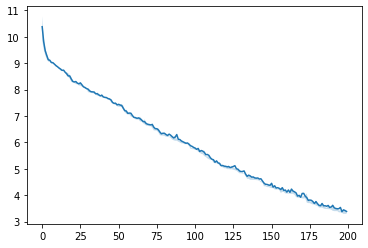

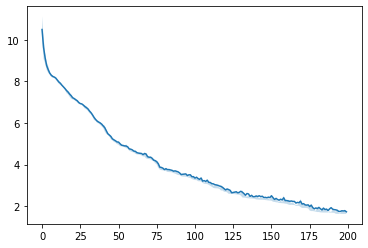

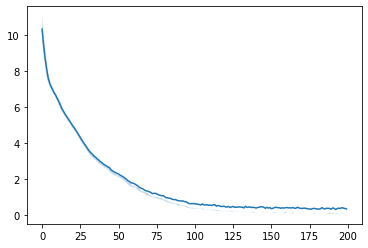

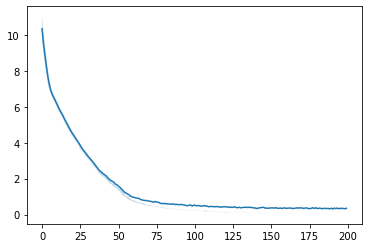

In [9]:
importlib.reload(ea_simple)

plt.figure(0)
ea_simple.summary(5,200,benchmarks.ackley,10,10)
plt.figure(1)
ea_simple.summary(10,200,benchmarks.ackley,10,10)
plt.figure(2)
ea_simple.summary(100,200,benchmarks.ackley,10,10)
plt.figure(3)
ea_simple.summary(200,200,benchmarks.ackley,10,10)

#on remarque que plus la population est grande moins la courbe est bruité
#et plus vite converge-t-elle

## 2. Apprentissage de politiques avec gym

L'objectif de cette question est de faire un premier apprentissage de politiques. Vous utiliserez pour cela un problème très simple: le pendule inversé. Il s'agit de contrôler un pendule fixé sur un chariot et capable de tourner. Le chariot peut se déplacer horizontalement. Les mouvements horizontaux du pendule font osciller le pendule et l'objectif est de le maintenir à la verticale.

OpenAI-gym est un framework permettant d'implémenter des expériences d'apprentissage par renforcement. Il propose une interface simple et unifiée et inclut de nombreux environnements utilisés pour tester des algorithmes d'apprentissage par renforcement. Vous utiliserez cet environnement et son module CartPole-v1 pour apprendre à contrôler le pendule (voir https://gym.openai.com/envs/CartPole-v1/). 

Complétez le fichier `gym_cartpole.py`. Vous tracerez dans le notebook l'évolution des fitness comme dans la question précédente. Les calculs étant plus longs, faites en fonction de vos capacités de calcul et, le cas échéant, indiquez en commentaire ce que vous vous attendriez à observer avec une puissance de calcul supérieure. Vous pourrez ne faire le tracé que pour une taille de population.

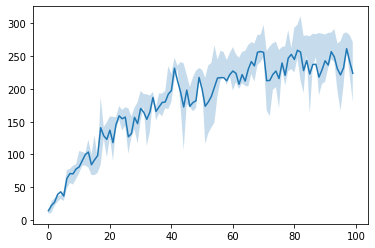

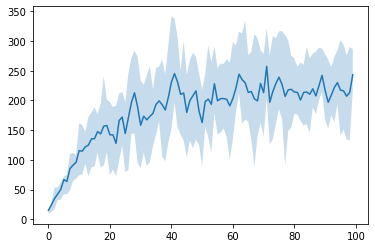

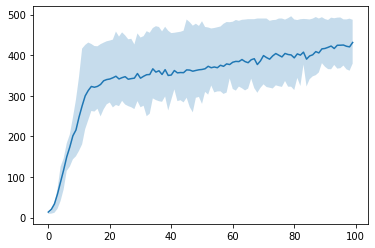

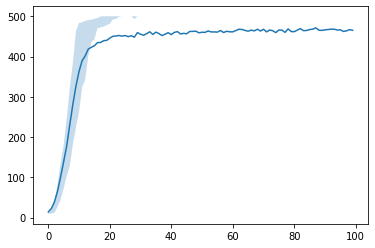

In [8]:
importlib.reload(gym_cartpole)

plt.figure(0)
gym_cartpole.ea_gym(5,100,10)
plt.figure(0)
gym_cartpole.ea_gym(10,100,10)
plt.figure(0)
gym_cartpole.ea_gym(100,100,10)
plt.figure(0)
gym_cartpole.ea_gym(200,100,10)

**Remarque**: L'évaluation du pendule commence à une position aléatoire. Affichez plusieurs fois de suite la fitness obtenue en visualisant un même individu. Vous devriez observez que la fitness obtenue n'est pas toujours la même. C'est une illustration du problème de la généralisation. Pendant l'apprentissage, une politique n'a été testée que dans une condition particulière. Si vous changer un peu les conditions, vous n'avez pas de garantie sur ce qu'il va se passer... Pour limiter ce problème, une stratégie simple consiste à calculer la fitness non pas sur une seule évaluation, mais sur plusieurs. Cela devrait réduire la variabilité observée. Si la puissance de calcul dont vous disposez le permet, vous pouvez modifier ainsi votre fontion d'évaluation.

## 3. Implémentation de NSGA-II

Implémentez maintenant NSGA-II en vous appuyant sur les fonctions fournies dans DEAP (fichier `nsga2.py` à compléter). Vous testerez NSGA-II sur un benchmark multi-objectif fourni dans DEAP, par exemple, la fonction de Fonseca et Fleming.

Utilisez l'hypervolume pour caractériser la performance et tracer les courbes avec l'hypervolume (moyenne et 1er-3eme quartiles).

Comme précédemment, tracez l'évolution de l'hypervolume (mediane et 1er et 3eme quartiles) pour des populations de taille [5, 10, 100, 200]. 

Que remarquez-vous ?

Dans le cas de la fonction de Fonseca, vous pourrez utiliser (1,1) comme point de référence.

In [4]:
print("Exemple d'utilisation du code de calcul de l'hypervolume. L'hypothèse est celle d'une minimisation.")
print("Il faut donner un point de référence correspondant, par exemple, aux valeurs maximales pour les objectifs.")
from deap.tools._hypervolume import hv
print("Hypervolume: %f"%(hv.hypervolume([np.array([1,0]), np.array([1,1]), np.array([0,1])], np.array([2,2]))))

Exemple d'utilisation du code de calcul de l'hypervolume. L'hypothèse est celle d'une minimisation.
Il faut donner un point de référence correspondant, par exemple, aux valeurs maximales pour les objectifs.
Hypervolume: 3.000000


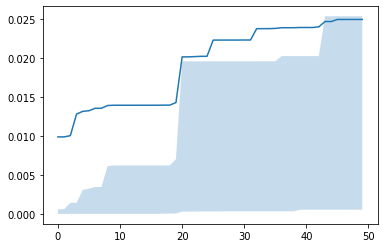

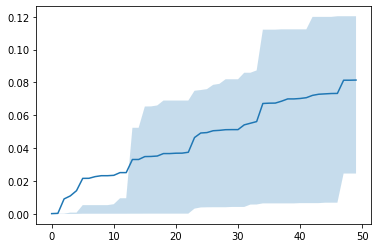

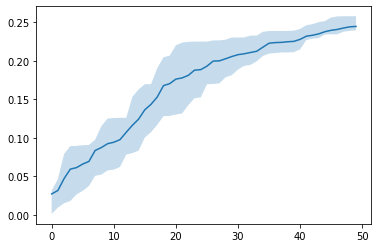

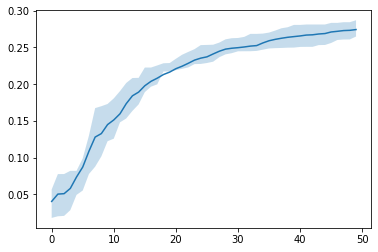

In [5]:
importlib.reload(nsga2)

plt.figure(0)
nsga2.summary(5,100,benchmarks.fonseca,5,10)
plt.figure(1)
nsga2.summary(10,100,benchmarks.fonseca,5,10)
plt.figure(2)
nsga2.summary(100,100,benchmarks.fonseca,5,10)
plt.figure(3)
nsga2.summary(200,100,benchmarks.fonseca,5,10)

#contrairement au première algorithme qui s'améliorais progressivement celui-ci s'augmente par pallier,
#dont il ne redescend pas en dessous un fois atteint.
#l'évolution pour une population trop petit est insignifiante par rapport à celle effectué par une population plus grande

## 4. Apprentissage direct dans l'espace des politiques, version multi-objectif

Le pendule inversé est en fait un problème multi-objectif dans lequel le pendule doit être maintenu à la verticale, le chariot étant centré dans une zone donnée. 

Compléter le fichier `gym_cartpole_2.py` pour minimiser l'erreur en x et en theta avec NSGA-2. Vous pourrez tracer l'évolution de l'hypervolume ou modifier le code de NSGA2 pour tracer l'évolution de l'erreur en x et de l'erreur en theta. 



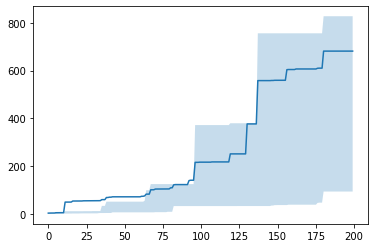

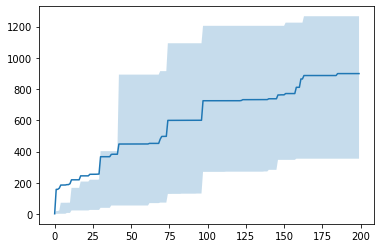

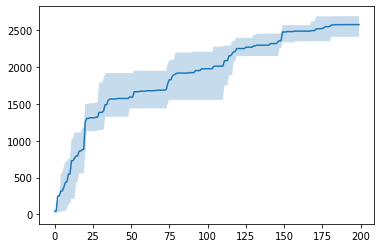

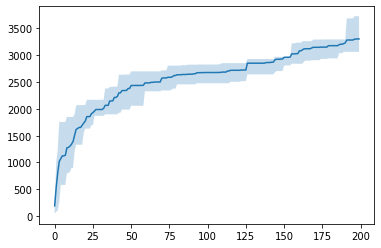

In [10]:
importlib.reload(gym_cartpole_2)

plt.figure(0)
nsga2.summary(5,200,gym_cartpole_2.eval_nn,61,10)
plt.figure(1)
nsga2.summary(10,200,gym_cartpole_2.eval_nn,61,10)
plt.figure(2)
nsga2.summary(100,200,gym_cartpole_2.eval_nn,61,10)
plt.figure(3)
nsga2.summary(200,200,gym_cartpole_2.eval_nn,61,10)